# ECMM422 Machine Learning
## Course Assessment 1

This course assessment (CA) represents 40% of the overall module assessment.

This is an individual exercise and your attention is drawn to the College and University guidelines on collaboration and plagiarism, which are available from the [College website](https://www.exeter.ac.uk/students/administration/complaintsandappeals/academicmisconduct/). 
Students are **not allowed** to use Large Language Models (such as ChatGPT, Claude, Gemini, etc) to generate code for the CA.


**Submission information:**
1. do not change the name of this notebook, i.e. the notebook file has to be: `ca.ipynb`
2. do not add you name or student code in the notebook or in the file name
3. do not remove or delete or add any cell in this notebook
4. make sure to **remove** and **delete** the `raise NotImplementedError()` under the `# YOUR CODE HERE` and replace it with **your code**: note that if you leave it in the cell you will fail the associated test
5. do not remove the function `save_history()` at the end of each cell. This function will save your edit operations on the code in the cell and will be used as proof of work, i.e. proof that you have been working on the questions assigned
6. work always in the cells provided when developing your implementation, i.e. do not work on another notebook or with programming environments that do not operate on this notebook.
7. when you are finished debugging **remove** all code that is not part of the function definition, i.e. leave only the clean function implementation in the cell: do not leave debugging `print` statements in the functions, and do not leave function invocations on test inputs
8. make sure that the execution of the cell **does not produce any type of output**: the execution of the cell should only define the desired functions
9. before the final submission run the function `check_and_prepare_for_submission()` in the last cell of the notebook: this function will create a zip archive called `ecmm422ca1.zip` which contains your notebook and the folder `proof_of_work`.
10. Submit only the file `ecmm422ca1.zip`


**Evaluation criteria:**

Each question asks for one or more functions to be implemented. 

- Each function is awarded a number of marks. 
- One or more hidden unit tests are going to evaluate if all desired properties of the required function are met. 
- If the function passes a test all the associated marks are awarded, if it fails 0 marks are awarded.
- If you make a typo error (e.g. misspelling a variable) this will likely causes a syntax error, the function execution will fail and you will be awarded 0 marks.
- Do not make assumptions on the state of previous cells, i.e. expect each function to be evaluated independently, moreover expect each function to be tested in the unit tests on some *randomly* generated input.

Although the test use a hard fail/pass strategy to assign marks, the presence of several questions and several unit tests per question allows a fine grading. 

The Checkpoints are not graded by default, but might be used to assign additional marks in case the execution of the code obtains the desired results even when some tests might fail.

**Efficiency:** There is a cap of a few minutes on the execution of each cell and unit test. Make sure your code is not terribly inefficient (for example having a cell run for hours, e.g. using nested loops rather than NumPy functions that can work directly on  arrays), otherwise the execution of the cell/unit test will be interrupted and considered a failure. 

## Conventions and notation:

Do not assume any library is avaialble other than `matplotlib`, `numpy`, `scipy`.

Assume Python 3.8.

---

In the rest of the notebook, the term `data matrix` refers to a two dimensional numpy array where instances are encoded as rows, e.g. a data matrix with 100 rows and 4 columns is to be interpreted as a collection of 100 instances (vectors) each of dimension four.

Make sure to convert numpy `matrix` objects to numpy arrays when returning a data matrix: only arrays are acceptable, not  numpy `matrix` objects. 

In the rest of the notebook, the term `vector` refers to a **one** dimensional numpy array. 

When we explicitly use the term `column vector` we mean a two dimensional array of shape `(n,1)`, when we explicitly use the term `row vector` we mean a two dimensional vector of shape `(1,n)`.

When the term `distance` is used we mean the Euclidean distance. 

The functions you are required to write often need to take in input and return as output such objects, i.e. numpy arrays, not python lists. Check the specifications for each required function in the question text. 

---

**Do not use library functions** to directly solve a question unless explicity instructed to do so. That is, when a required function can be implemented directly by a library function it is intended that the candidate should write their own implementation of the function: for example it the Question asks to implement a function to compute the `accuracy` one cannot just wrap the function `accuracy_score` from `sklearn.metrics` in a custom function; if a question asks to implement the K-nearest_neighbor algorithm one cannot just wrap the function `KNeighborsClassifier` from `sklearn.neighbors` in a custom function.

---

Do not assume that the implementations provided in the Workshops exercises contain no mistakes. You should write and are ultimately responsible for the code that you submit in this Assessment.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from typing import List, Tuple
from submission_utils import save_history, check_and_prepare_for_submission
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## Question 1

<div style="text-align: right"><b>[10 marks]</b></div>

**Generating and Visualizing Synthetic Datasets for 1D Polynomial Regression**

---

**Objective:**

In this section of the assignment you will implement three functions:

1. **`polynomial`**  
   This function will evaluate a polynomial at given input values using only basic NumPy operations (e.g., multiplication, addition, exponentiation).  
   <div style="text-align: right"><b>[5 marks]</b></div>

2. **`generate_polynomial_data`**  
   This function generates synthetic 1D regression data based on a polynomial function with added Gaussian noise. It must use your `polynomial` function for computing the polynomial values.  
   <div style="text-align: right"><b>[2 marks]</b></div>

3. **`plot_regression_data`**  
   This function visualizes the generated data by plotting both the noisy data points and the true, noise-free polynomial curve (computed using your `polynomial` function).  
   <div style="text-align: right"><b>[3 marks]</b></div>

---

### Detailed Instructions

1. **`polynomial`:**
   - **Task:**  
     Implement the function `polynomial` that evaluates a polynomial for a given input array of values using only basic NumPy operations.
     
   - **Parameters:**
     - `p` (`np.ndarray`): A 1D NumPy array of polynomial coefficients, ordered from the coefficient of the highest degree term to the constant term.  
       For example, if 
       $
       p = \begin{bmatrix} a \\ b \\ c \end{bmatrix},
       $
       the polynomial represented is:
       $
       P(x) = a \cdot x^2 + b \cdot x + c.
       $
     - `x` (`np.ndarray`): The array of points at which to evaluate the polynomial.
     
   - **Returns:**
     - A NumPy array computed as:
       $
       P(x) = p_0 \cdot x^{n-1} + p_1 \cdot x^{n-2} + \dots + p_{n-1},
       $
       where $ n $ is the number of coefficients.
     
   **Important:** Do **not** use any built-in polynomial evaluation functions; use only basic NumPy operations (element-wise multiplication, exponentiation, and addition).

2. **`generate_polynomial_data`:**

   **Task:**  
   Implement the function `generate_polynomial_data` to create a synthetic dataset for a 1D regression problem using a polynomial model. This function should evaluate the polynomial at uniformly sampled x values and then add noise to the corresponding y values. The noise is added in an asymmetric manner: for each data point, decide uniformly at random whether to add or subtract noise. If noise is added, sample it from a normal distribution with mean 0 and a standard deviation of `pos_noise_std`. If noise is subtracted, sample it from a normal distribution with mean 0 and a standard deviation of `neg_noise_std`.

   **Parameters:**
   - **n_samples** (`int`): The number of data points to generate.
   - **polynomial_coeffs** (`np.ndarray`): A 1D NumPy array containing the polynomial coefficients, ordered from the coefficient of the highest degree term to the constant term.
   - **x_range** (`Tuple[float, float]`): A tuple `(x_min, x_max)` specifying the range from which to uniformly sample the x values.
   - **pos_noise_std** (`float`): The standard deviation of the Gaussian noise to be added when noise is applied in the positive direction.
   - **neg_noise_std** (`float`): The standard deviation of the Gaussian noise to be subtracted when noise is applied in the negative direction.
   - **poly_func** (`callable`): A function that evaluates the polynomial at given x values. (For this assignment, this will be your `polynomial` function.)
   - **random_seed** (`Optional[int]`): An optional integer seed for the random number generator to ensure reproducibility (default is `None`).

   **Returns:**
   - **x** (`np.ndarray`): A 1D NumPy array of shape `(n_samples,)` containing the generated x values.
   - **y** (`np.ndarray`): A 1D NumPy array of shape `(n_samples,)` containing the y values computed as follows:
     
     $$
     y = \text{poly\_func}(\text{polynomial\_coeffs}, x) + \text{noise},
     $$
     
     where, for each data point, the noise is drawn from a normal distribution with mean 0 and standard deviation `pos_noise_std` if adding noise, or drawn from a normal distribution with mean 0 and standard deviation `neg_noise_std` if subtracting noise. The decision to add or subtract the noise is made uniformly at random for each sample.

3. **`plot_regression_data`:**
   - **Task:**  
     Implement the function `plot_regression_data` that visualizes the regression data.
     
   - **Parameters:**
     - `x` (`np.ndarray`): A 1D NumPy array of x values.
     - `y` (`np.ndarray`): A 1D NumPy array of y values corresponding to the noisy data.
     - `polynomial_coeffs` (`np.ndarray`): A 1D NumPy array of the coefficients of the true polynomial function.
     - `poly_func` (callable): The student-defined polynomial evaluation function (i.e., `polynomial`).
     - `title` (str): A title for the plot.
     - `fig_size` (Tuple[int, int]): The size of the figure (e.g., `(8, 6)`).
     
   - **Returns:**
     - A plot displaying:
       - A scatter plot of the noisy data points.
       - A line plot of the true polynomial curve (computed without noise using `poly_func` over a dense set of x values).
     - The plot should include appropriate axis labels, a legend that distinguishes between the noisy data and the true curve, and the given title.

---

**Note:**
- Use the `numpy` library for all numerical operations.
- Use the `matplotlib` library for creating the visualization.
- When generating the dataset in `generate_polynomial_data`, ensure that the x values are uniformly sampled from the specified `x_range` and that noise is added correctly.
- The function `plot_regression_data` should clearly show both the scattered noisy data and the continuous, noise-free polynomial curve.

---


In [2]:
def polynomial(p: np.ndarray, x: np.ndarray) -> np.ndarray:
    # YOUR CODE HERE
    n = len(p)
    return sum(p[i]*x**(n-1-i) for i in range (n))

def generate_polynomial_data(n_samples: int, 
                             polynomial_coeffs: np.ndarray, 
                             x_range: tuple, 
                             pos_noise_std: float, 
                             neg_noise_std: float, 
                             poly_func: callable, 
                             random_seed: int = None) -> (np.ndarray, np.ndarray):
    # YOUR CODE HERE
    if random_seed is not None:
        np.random.seed(random_seed)

    x = np.random.uniform(x_range[0], x_range[1], n_samples)
    y = poly_func(polynomial_coeffs, x)

    # Add noise
    noise_sign = np.random.choice([-1,1], size=n_samples)
    noise_std = np.where(noise_sign == 1, pos_noise_std, neg_noise_std)
    noise = noise_sign * np.random.normal(0, noise_std, n_samples)

    y_noise = y + noise
    
    return x, y_noise


def plot_regression_data(x: np.ndarray, 
                         y: np.ndarray, 
                         polynomial_coeffs: np.ndarray, 
                         poly_func, 
                         title: str, 
                         fig_size: tuple):
    # YOUR CODE HERE
    plt.figure(figsize=fig_size)
    plt.scatter(x, y, color='blue', label='Noisy Data', alpha=0.6)

    x_dense = np.linspace(min(x), max(x), 100)
    y_truepoly = poly_func(polynomial_coeffs, x_dense)
    plt.plot(x_dense, y_truepoly, color='red', label='True Polynomial Data')
    
    plt.xlabel('x')   
    plt.ylabel('y')
    plt.ylim(-6,5)
    plt.title(title)
    plt.legend()
    plt.show()
    

save_history()

In [3]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [4]:
# This cell is reserved for the unit tests. Do not consider this cell. 


In [5]:
# This cell is reserved for the unit tests. Do not consider this cell. 


## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. 

Execute the following code (just execute the next cell):
```python
coeffs = np.array([1, 0, -5, 0, 4, 0])
n_samples = 100
x_range = (-2, 2)
pos_noise_std = 0.5
neg_noise_std = 2.5
random_seed = 42
x, y = generate_polynomial_data(n_samples, coeffs, x_range, pos_noise_std, neg_noise_std, polynomial, random_seed)
plot_regression_data(x, y, coeffs, polynomial, "Polynomial Regression Data", (9, 4))
```

and check that you obtain a plot similar to:

<img src="img1.png" width=40%>


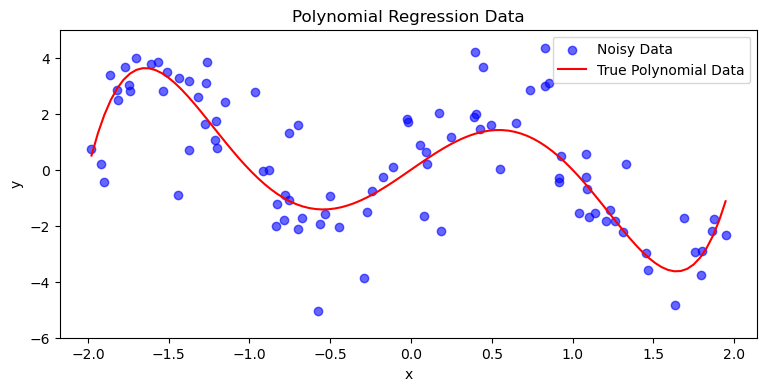

In [6]:
coeffs = np.array([1, 0, -5, 0, 4, 0])
n_samples = 100
x_range = (-2, 2)
pos_noise_std = 0.5
neg_noise_std = 2.5
random_seed = 42
x, y = generate_polynomial_data(n_samples, coeffs, x_range, pos_noise_std, neg_noise_std, polynomial, random_seed)
plot_regression_data(x, y, coeffs, polynomial, "Polynomial Regression Data", (9, 4))

## Question 2: Implementing Loss Functions

<div style="text-align: right"><b>[15 marks]</b></div>

**Implementing Different Loss Functions for Machine Learning**

---

**Objective:**

In this question, you will implement several loss functions that are widely used to quantify the error between predicted values and true targets. You are to implement the following five functions using only basic NumPy operations (such as arithmetic operators, exponentiation, logarithms, and maximum):

1. **Mean Squared Error (MSE) Loss**  
2. **Mean Absolute Error (MAE) Loss**  
3. **Hinge Loss**  
4. **Log Loss (Binary Cross-Entropy Loss)**  
5. **Linex Loss (Asymmetric Loss)**

Use only basic operations provided by NumPy; do not use any built-in loss functions from higher-level libraries.

---

### Detailed Instructions

For each loss function, implement the function following the description below. The function should accept the specified parameters (listed with their types) and return a single float value representing the computed loss.

**Expected Behavior:**
   - Return the average (mean) of the individual errors.

1. **Mean Squared Error (MSE) Loss**  
   <div style="text-align: right"><b>[2 marks]</b></div>

   **Parameters:**
   - **y_true** (`np.ndarray`): A 1D NumPy array of true target values.
   - **y_pred** (`np.ndarray`): A 1D NumPy array of predicted values.


2. **Mean Absolute Error (MAE) Loss**  
   <div style="text-align: right"><b>[2 marks]</b></div>

   **Parameters:**
   - **y_true** (`np.ndarray`): A 1D NumPy array of true target values.
   - **y_pred** (`np.ndarray`): A 1D NumPy array of predicted values.


3. **Hinge Loss**  
   <div style="text-align: right"><b>[3 marks]</b></div>

   **Parameters:**
   - **y_true** (`np.ndarray`): A 1D NumPy array of true labels. (The values are expected to be either -1 or 1.)
   - **y_pred** (`np.ndarray`): A 1D NumPy array of predicted scores (real-valued).


4. **Log Loss (Binary Cross-Entropy Loss)**  
   <div style="text-align: right"><b>[3 marks]</b></div>

   **Parameters:**
   - **y_true** (`np.ndarray`): A 1D NumPy array of true binary labels (0 or 1).
   - **y_pred** (`np.ndarray`): A 1D NumPy array of predicted probabilities (each value should be between 0 and 1).
   - **eps** (`float`, default value: 1e-15): A small constant to ensure numerical stability (avoid taking the logarithm of zero).

5. **Asymmetric linear-exponential (LINEX) loss function**
 
In the symmetric loss function, the estimation treats overestimation and underestimation equally, whereas the asymmetric loss function gives different weights to overestimation and underestimation. Compared with the symmetric loss, the asymmetric loss is more realistic and useful in practical applications.

Reference: Nassar, M., R. Alotaibi, H. Okasha, and L. Wang. Bayesian Estimation Using Expected LINEX Loss Function: A Novel Approach with Applications. Mathematics 2022, 10, 436. 2022.  [Link to article](https://www.mdpi.com/2227-7390/10/3/436)
   <div style="text-align: right"><b>[5 marks]</b></div>

   **Parameters:**
   - **y_true** (`np.ndarray`): A 1D NumPy array of true target values.
   - **y_pred** (`np.ndarray`): A 1D NumPy array of predicted values.
   - **a** (`float`, default value: 1.0): The asymmetry parameter.  
     - If `a > 0`, the function penalizes overestimation more severely.
     - If `a < 0`, underestimation is penalized more.
   - **reduction** (`str`, default value: "mean"): Specifies how to reduce the loss:
     - If `"mean"`, return the average loss.
     - If `"sum"`, return the sum of the losses.

   **Expected Behavior:**
   - Compute the error for each sample as $ e_i = y_{\text{pred}_i} - y_{\text{true}_i} $.
   - For each sample, compute the loss using the Linex formula:  
     $$
     L(e_i) = \exp\left(a \cdot e_i\right) - a \cdot e_i - 1.
     $$
   - Depending on the `reduction` parameter, either return the average of all $ L(e_i) $ (if `"mean"`) or the total sum (if `"sum"`).


In [7]:
def mse_loss(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return np.sum((y_true - y_pred) ** 2) / len(y_true)

def mae_loss(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return np.sum(np.abs(y_true - y_pred)) / len(y_true)

def hinge_loss(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return np.sum(np.maximum(0, 1 - y_true * y_pred)) / len(y_true)

def log_loss(y_true: np.ndarray, y_pred: np.ndarray, eps: float = 1e-15) -> float:
    y_pred = np.where(y_pred < eps, eps, y_pred)
    y_pred = np.where(y_pred > 1 - eps, 1 - eps, y_pred)
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / len(y_true)

def linex_loss(y_true: np.ndarray, y_pred: np.ndarray, a: float = 1.0, reduction: str = "mean") -> float:
    error = y_pred - y_true
    loss = np.exp(a * error) - a * error - 1
    if reduction == "sum":
        return np.sum(loss)
    return np.sum(loss) / len(y_true)

save_history()

In [8]:
# This cell is reserved for the unit tests. Do not consider this cell. 


In [9]:
# This cell is reserved for the unit tests. Do not consider this cell. 


In [10]:
# This cell is reserved for the unit tests. Do not consider this cell. 


In [11]:
# This cell is reserved for the unit tests. Do not consider this cell. 


In [12]:
# This cell is reserved for the unit tests. Do not consider this cell. 


## Question 3: Fitting a Polynomial using Optimization

<div style="text-align: right"><b>[10 marks]</b></div>

**Optimizing a Polynomial Fit with `scipy.optimize.minimize`**

---

**Objective:**

In this question, you will use the `scipy.optimize.minimize` function to optimize a polynomial fit. The goal is to adjust the coefficients of a polynomial so that the output of your model best fits the given data, as measured by a user-defined loss function.

---

### Explanation of `scipy.optimize.minimize`

The `scipy.optimize.minimize` function is a general-purpose optimizer that finds the minimum of a scalar-valued function. See documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).
Its key components are:

- **objective:**  
  A function that takes an array of parameters and returns a single scalar value representing the cost (or loss). In this task, the objective function computes the loss between the observed data and the predictions of your polynomial model.

- **initial_guess:**  
  A NumPy array that provides the starting point for the optimization. For a polynomial of degree `n`, you will have `n + 1` coefficients.

- **method:**  
  The algorithm used for optimization (for example, `"BFGS"` is suitable for many smooth, unconstrained problems).

- **Result Object:**  
  The output of `minimize` is an object containing:
  - `result.x`: A NumPy array with the optimized coefficients.
  - `result.success`: A Boolean flag indicating if the optimization was successful.
  - `result.message`: A message describing the termination status (useful for debugging).

---

### Task: Implement `fit_polynomial`

Your task is to implement the function `fit_polynomial` with the following inputs:

- **x** (`np.ndarray`): A 1D NumPy array containing the independent variable values.
- **y** (`np.ndarray`): A 1D NumPy array containing the observed dependent variable values.
- **degree** (`int`): The degree of the polynomial you wish to fit.
- **loss_fn** (`callable`): A user-defined loss function that computes the error between the predicted values and the true values. It accepts two NumPy arrays (`y_true` and `y_pred`) and returns a float.
- **poly_func** (`callable`): A function that evaluates a polynomial at given x values. It takes a NumPy array of coefficients (ordered from highest degree term to constant term) and a NumPy array of x values, and returns the predicted y values.

---

### Expected Output

When your `fit_polynomial` function is called, it should return a NumPy array containing the optimized polynomial coefficients. These coefficients should:

- Be returned as a 1D NumPy array of length `degree + 1`.
- Be arranged in descending order of power (i.e., the first element is the coefficient for $ x^{\text{degree}} $ and the last element is the constant term).
- Represent the set of coefficients that minimizes the loss function when the polynomial is evaluated at the provided x values and compared to the observed y values.

For example, if you fit a polynomial of degree 2 (a quadratic) to some data, the output might look like:

```python
array([a, b, c])
```

which corresponds to the polynomial:
$$
P(x) = a \cdot x^2 + b \cdot x + c.
$$

The quality of the fit is measured by the loss function you provide; therefore, the lower the returned loss, the better the polynomial fits the data.

---


In [13]:
def fit_polynomial(x: np.ndarray, y: np.ndarray, degree: int, loss_fn: callable, poly_func: callable) -> np.ndarray:
    
    initial_guess = np.random.randn(degree + 1)
    def objective(coeffs):
        y_pred = poly_func(coeffs, x)
        return loss_fn(y, y_pred)

    get_result = sp.optimize.minimize(objective, initial_guess, method="BFGS")
    
    if get_result.success:
        return get_result.x
    else:
        print("Optimization failed:", result.message)
        return initial_guess
save_history()

In [14]:
# This cell is reserved for the unit tests. Do not consider this cell. 


In [15]:
# This cell is reserved for the unit tests. Do not consider this cell. 


## Question 4: Visualizing Residuals on Test Data

<div style="text-align: right"><b>[5 marks]</b></div>

**Plotting Residuals on Test Data After a Train-Test Split**

---

**Objective:**

In regression tasks, analyzing residuals—the differences between the true target values and the predictions—helps uncover issues such as bias or non-constant variance. In this exercise, you will implement a function named **`plot_residuals`** that performs the following steps:

1. **Train-Test Split:**  
   Internally split the provided dataset into a training set (70%) and a test set (30%) in a reproducible manner using an optional random seed.

2. **Model Fitting:**  
   Fit a polynomial model on the training data using a provided loss function (`loss_fn`) and a polynomial evaluation function (`poly_func`). (You may assume that a helper function `fit_polynomial` is available.)

3. **Prediction and Loss Computation:**  
   Use the fitted model to predict the target values on the test set and compute the average loss on the test data using the Mean Squared Error (MSE) loss function (i.e., `mse_loss`). This average loss should be appended to the plot title.

4. **Plotting:**  
   - Generate a dense set of x values spanning the range of the test data for a smooth curve of the fitted polynomial.
   - Plot the fitted polynomial as a smooth blue line.
   - Plot the true test data as green scatter points.
   - Draw vertical dashed red lines connecting each test x value’s predicted value to its corresponding true value.
   - Label the x-axis as `"x"` and the y-axis as `"y"`.
   - Set the plot title to include both the provided title and the computed average MSE loss.
   - Include a legend to distinguish the fitted function, true data, and residuals.

---

### Detailed Instructions

Implement a function named **`plot_residuals`** with the following parameters:

- **x** (`np.ndarray`): A 1D NumPy array of independent variable values.
- **y_true** (`np.ndarray`): A 1D NumPy array of true target values.
- **degree** (`int`): The degree of the polynomial to be fitted.
- **loss_fn** (`callable`): A loss function used to fit the polynomial on the training data.
- **poly_func** (`callable`): A function to evaluate the polynomial at given x values. This function should take a NumPy array of coefficients (ordered from highest degree to constant) and a NumPy array of x values.
- **title** (`str`): A string representing the title of the plot.
- **fig_size** (`tuple` of two ints): A tuple specifying the figure size (e.g., `(8, 6)`).
- **random_seed** (`int`, optional): An optional seed to ensure reproducibility of the train-test split.

**Expected Behavior:**

- **Data Splitting:**  
  Internally split the data into training (70%) and test (30%) sets in a reproducible way (using the provided `random_seed`).

- **Fitting and Prediction:**  
  Fit the polynomial on the training data using `fit_polynomial` (which accepts `loss_fn` and `poly_func` as inputs). Then, compute predictions on the test data.

- **Loss Computation:**  
  Compute the average MSE loss on the test set using `mse_loss` (regardless of the provided `loss_fn`). Append this loss value (formatted to 4 decimal places) to the plot title.

- **Plotting:**  
  - Generate a dense set of x values over the range of the test data and compute the corresponding y values for a smooth curve.
  - Plot the fitted polynomial as a blue line.
  - Plot the true test data as green scatter points.
  - Draw vertical dashed red lines from each test x value's predicted value to its true value.
  - Label the axes, set the plot title (including the test average MSE loss), and add a legend.
  - Display the plot.


In [16]:
def plot_residuals(x: np.ndarray, y_true: np.ndarray, degree: int, loss_fn: callable, poly_func: callable, title: str, fig_size: tuple, random_seed: int = 42):
    if random_seed is not None:
        np.random.seed(random_seed)

    # Create train-test split 70-30
    indices = np.arange(len(x))
    np.random.shuffle(indices)
    split_index = int(0.7 * len(x))
    train_index, test_index = indices[:split_index], indices[split_index:]

    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y_true[train_index], y_true[test_index]

    #polynomial fitting
    coeffs = fit_polynomial(x_train, y_train, degree, loss_fn, poly_func)

    y_pred = poly_func(coeffs, x_test)

    mse = mse_loss(y_test, y_pred)

    x_dense = np.linspace(min(x), max(x), 1000)
    y_dense = poly_func(coeffs, x_dense)

    # Plot
    plt.figure(figsize=fig_size)
    plt.plot(x_dense, y_dense, label='Fitted Polynomial', color='blue', linewidth=2)
    plt.scatter(x_test, y_test, label='Test Data', color='green', s=30, zorder=5)

    for i in range(len(x_test)):
        plt.plot([x_test[i], x_test[i]], [y_test[i], y_pred[i]], 'r--', lw=1,label='Residual' if i == 0 else "")

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"{title} (Test MSE: {mse:.4f})")
    plt.legend(loc=3)
    plt.show()

save_history()

In [17]:
# This cell is reserved for the unit tests. Do not consider this cell.


In [18]:
# This cell is reserved for the unit tests. Do not consider this cell.


## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. 

Execute the following code (just execute the next cell):
```python
coeffs = np.array([1, 0, -5, 0, 4, 0])
n_samples = 50
x_range = (-2, 2)
pos_noise_std = 0.5
neg_noise_std = 2.5
random_seed = 42
x, y = generate_polynomial_data(n_samples, coeffs, x_range, pos_noise_std, neg_noise_std, polynomial, random_seed)

degree = 3
loss_fn = mse_loss
poly_func=polynomial
plot_residuals(x, y, degree, loss_fn, poly_func, f"Residual Plot for degree {degree} Polynomial", (5, 3))

degree = 5
plot_residuals(x, y, degree, loss_fn, poly_func, f"Residual Plot for degree {degree} Polynomial", (5, 3))

def aloss(y_true: np.ndarray, y_pred: np.ndarray):
    return linex_loss(y_true, y_pred, a=-1.1)

degree = 5
plot_residuals(x, y, degree, aloss, poly_func, f"Residual Plot for degree {degree} Polynomial", (5, 3))
```

and check that you obtain a plot similar to:

<img src="img2.png" width=40%>


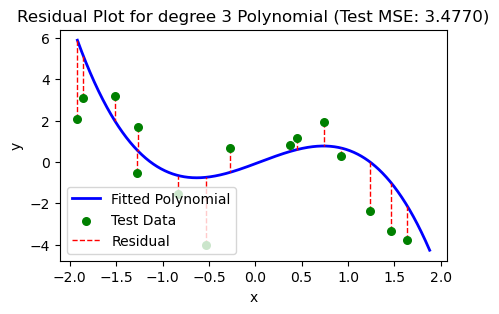

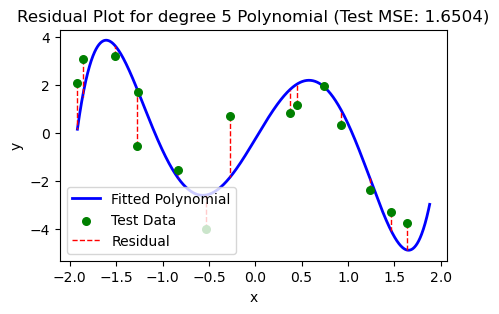

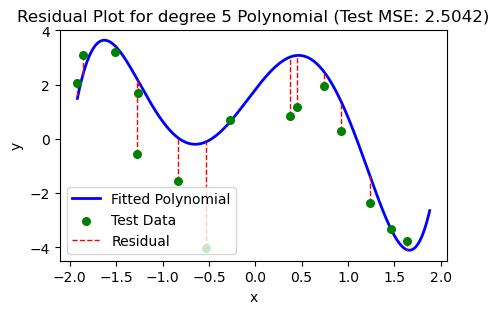

In [19]:
coeffs = np.array([1, 0, -5, 0, 4, 0])
n_samples = 50
x_range = (-2, 2)
pos_noise_std = 0.5
neg_noise_std = 2.5
random_seed = 42
x, y = generate_polynomial_data(n_samples, coeffs, x_range, pos_noise_std, neg_noise_std, polynomial, random_seed)

degree = 3
loss_fn = mse_loss
poly_func=polynomial
plot_residuals(x, y, degree, loss_fn, poly_func, f"Residual Plot for degree {degree} Polynomial", (5, 3))

degree = 5
plot_residuals(x, y, degree, loss_fn, poly_func, f"Residual Plot for degree {degree} Polynomial", (5, 3))

def aloss(y_true: np.ndarray, y_pred: np.ndarray):
    return linex_loss(y_true, y_pred, a=-1.1)

degree = 5
plot_residuals(x, y, degree, aloss, poly_func, f"Residual Plot for degree {degree} Polynomial", (5, 3))


## Question 5

<div style="text-align: right"><b>[10 marks]</b></div>

**Implementing a Polynomial Estimator Class**

---

**Objective:**

In this question you will implement a Python class, **`PolynomialEstimator`**, that encapsulates the process of fitting and predicting using a polynomial regression model. The estimator will be initialized with a specified polynomial degree and a loss function. Internally, it will use the provided functions **`fit_polynomial`** and **`polynomial`** to perform the model fitting and prediction, respectively.

---

### Detailed Instructions

You are required to implement the class **`PolynomialEstimator`** with the following specifications:

1. **Constructor (`__init__`):**  
   - **Task:**  
     Create an `__init__` method that accepts the following parameters:
     - **`degree`** (`int`): The degree of the polynomial model.
     - **`loss_func`** (`callable`): A loss function used to measure the error between predicted and true values.
     - **`poly_func`** (`callable`): The polynomial evaluation function with the signature:
       ```python
       def polynomial(p: np.ndarray, x: np.ndarray) -> np.ndarray:
       ```
       This function evaluates the polynomial at given x values using the coefficients.
     
   - **Requirements:**  
     - Store the provided `degree`, `loss_func`, and `poly_func` as instance variables.
     - Initialize an instance variable (e.g., `self.coeffs`) to store the optimized polynomial coefficients once the model is fitted.

2. **Method `fit`:**  
   - **Task:**  
     Implement the `fit` method with the following signature:
     ```python
     def fit(self, x: np.ndarray, y: np.ndarray) -> None:
     ```
     This method fits the polynomial model to the training data.
     
   - **Implementation Details:**  
     - Use the provided function **`fit_polynomial`** to compute the optimized coefficients.  
     - Store the returned coefficients in an instance variable (e.g., `self.coeffs`).

3. **Method `predict`:**  
   - **Task:**  
     Implement the `predict` method with the following signature:
     ```python
     def predict(self, x: np.ndarray) -> np.ndarray:
     ```
     This method uses the fitted model to predict outputs for given input values.
     
   - **Implementation Details:**  
     - Ensure that the model has been fitted (i.e., `self.coeffs` is available, raise **ValueError** if not).  
     - Return the predicted values.

In [20]:

class PolynomialEstimator:
    """
    A polynomial regression estimator that uses a specified degree and loss function.
    It fits a polynomial model using the provided fit_polynomial function and
    makes predictions using the provided polynomial function.
    """
    
    def __init__(self, degree: int, loss_func: callable, poly_func: callable):
        """
        Constructor for the PolynomialEstimator.

        Parameters:
            degree (int): The degree of the polynomial model.
            loss_func (callable): A loss function used to measure the error between predicted and true values.
            poly_func (callable): A function to evaluate the polynomial given coefficients and x values.
        """
        self.degree = degree
        self.loss_func = loss_func
        self.poly_func = poly_func
        self.coeffs = None

    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        """
        Fit the polynomial model to the training data.

        Parameters:
            x (np.ndarray): 1D array of independent variable values.
            y (np.ndarray): 1D array of dependent variable (target) values.
        """
        self.coeffs = fit_polynomial(x, y, self.degree, self.loss_func, self.poly_func)

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Predict the output values for given input values using the fitted model.

        Parameters:
            x (np.ndarray): 1D array of independent variable values for prediction.

        Returns:
            np.ndarray: Predicted dependent variable values.
        """
        if self.coeffs is None:
            raise ValueError("Model has not been fitted. Call 'fit' before 'predict'.")
        
        return self.poly_func(self.coeffs, x)
save_history()

In [21]:
# This cell is reserved for the unit tests. Do not consider this cell. 


In [22]:
# This cell is reserved for the unit tests. Do not consider this cell.


## Question 6

<div style="text-align: right"><b>[5 marks]</b></div>

**Creating Bootstrap Samples with Out‐of‐Bag Data for Bias–Variance Analysis**

---

**Objective:**

In this section you will implement a function to create bootstrap samples from a given 1D dataset and also determine the out‐of‐bag (OOB) samples for each bootstrap sample. Bootstrap sampling is a key technique for estimating the bias and variance of a model by resampling with replacement from the original data. The OOB samples provide a means of validating the model on data that were not used in training the bootstrap sample.

---

### Detailed Instructions

Implement the function **`create_bootstrap_samples`** with the following requirements:

- **Task:**  
  Write a function that takes as input the feature array `x`, target array `y`, and an integer `num_bootstrap` indicating the number of bootstrap samples to generate. For each bootstrap sample, the function should:
  1. Randomly sample, with replacement, from the original data such that each bootstrap sample has the same size as the original dataset.
  2. Determine the out‐of‐bag (OOB) samples—that is, the instances from the original dataset that were **not** selected in the bootstrap sample.

- **Parameters:**
  - **x** (`np.ndarray`): A 1D NumPy array of shape `(n_samples,)` containing the independent variable values.
  - **y** (`np.ndarray`): A 1D NumPy array of shape `(n_samples,)` containing the corresponding target values.
  - **num_bootstrap** (`int`): The number of bootstrap samples to generate.

- **Returns:**
  - A list of tuples, where each tuple is of the form `(bootstrap_x, bootstrap_y, oob_x, oob_y)`:
    - **bootstrap_x** (`np.ndarray`): A 1D NumPy array of shape `(n_samples,)` containing the resampled x values.
    - **bootstrap_y** (`np.ndarray`): A 1D NumPy array of shape `(n_samples,)` containing the corresponding resampled y values.
    - **oob_x** (`np.ndarray`): A 1D NumPy array containing the x values that were **not** selected in the bootstrap sample.
    - **oob_y** (`np.ndarray`): A 1D NumPy array containing the corresponding y values for the out‐of‐bag samples.

In [26]:
def create_bootstrap_samples(x: np.ndarray, y: np.ndarray, num_bootstrap: int) -> List[Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]]:
    """
    Creates a list of bootstrap samples from the given dataset along with the corresponding out‐of‐bag (OOB) samples.
    
    Parameters:
        x (np.ndarray): A 1D NumPy array of shape (n_samples,) containing the independent variable values.
        y (np.ndarray): A 1D NumPy array of shape (n_samples,) containing the corresponding target values.
        num_bootstrap (int): The number of bootstrap samples to generate.
    
    Returns:
        List[Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]]: A list of tuples, where each tuple is of the form:
            (bootstrap_x, bootstrap_y, oob_x, oob_y)
            - bootstrap_x (np.ndarray): Resampled x values (shape (n_samples,)).
            - bootstrap_y (np.ndarray): Corresponding resampled y values (shape (n_samples,)).
            - oob_x (np.ndarray): x values not selected in the bootstrap sample.
            - oob_y (np.ndarray): Corresponding y values for the out‐of‐bag samples.
    """
    # YOUR CODE HERE
    n_samples = len(x)
    bootstrap_results = []

    for _ in range(num_bootstrap):
        bootstrap_indices = np.random.choice(n_samples, size = n_samples, replace = True)
        oob_mask = np.ones(n_samples, dtype=bool)
        oob_mask[bootstrap_indices] = False

        bootstrap_x = x[bootstrap_indices]
        bootstrap_y = y[bootstrap_indices]


        oob_x = x[oob_mask]
        oob_y = y[oob_mask]

        bootstrap_results.append((bootstrap_x, bootstrap_y, oob_x, oob_y))
    return(bootstrap_results)
    
save_history()

In [27]:
# This cell is reserved for the unit tests. Do not consider this cell.


## Question 7

<div style="text-align: right"><b>[15 marks]</b></div>

**Estimating Bias and Variance via Bootstrap Sampling with Out‐of‐Bag Testing**

---

**Objective:**

Implement the function **`bias_variance_estimate`** to compute the bias and variance of a polynomial regression model’s predictions using bootstrap sampling with OOB testing. In this approach, for each bootstrap sample, a new instance of the provided `PolynomialEstimator` is fitted on the resampled data and evaluated on the corresponding OOB samples. The bias and variance for each training instance are computed by aggregating the OOB predictions over all trials.

---

### Detailed Instructions

Implement **`bias_variance_estimate`** so that it:

1. **Generates Bootstrap Samples:**  
   Use your bootstrapping routine (e.g., your implementation of `create_bootstrap_samples`) to generate a specified number of bootstrap samples from the training data. Each sample should include both the resampled data and its corresponding OOB samples.

2. **Fits and Evaluates the Model:**  
   For each bootstrap sample, create a new instance of the provided `PolynomialEstimator`, fit it on the bootstrap data, and obtain predictions on the OOB data.

3. **Aggregates Predictions:**  
   For each training instance, collect all OOB predictions from the trials in which that instance was OOB.

4. **Computes Statistics:**  
   For every training instance, compute:
   - The mean of the aggregated OOB predictions,
   - The bias (as the squared difference between the true target value and the mean prediction),
   - The variance of the OOB predictions.

If an instance never appears in the OOB samples, assign `np.nan` for its statistics.

---

**Parameters:**

- **x** (`np.ndarray`): A 1D array of training input values.
- **y** (`np.ndarray`): A 1D array of training target values.
- **estimator** (`PolynomialEstimator`): An already initialized instance of the `PolynomialEstimator` class.
- **num_trials** (`int`): The number of bootstrap samples to use.

---

**Returns:**

- **mean_predictions** (`np.ndarray`): A 1D array (length equal to the number of training instances) containing the mean OOB prediction for each instance.
- **bias** (`np.ndarray`): A 1D array with the bias (squared error) for each instance.
- **variance** (`np.ndarray`): A 1D array with the variance of the OOB predictions for each instance.

---

Happy coding and best of luck with your implementation!

In [29]:
import numpy as np
from typing import Tuple

def bias_variance_estimate(x: np.ndarray,
                           y: np.ndarray,
                           estimator,  # an initialized instance of PolynomialEstimator
                           num_trials: int) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Estimates the bias and variance for each training instance using bootstrap sampling
    with out-of-bag (OOB) testing.

    Parameters:
        x (np.ndarray): 1D array of training input values (assumed unique).
        y (np.ndarray): 1D array of training target values.
        estimator: An initialized instance of PolynomialEstimator.
        num_trials (int): Number of bootstrap samples (trials) to use.

    Returns:
        mean_predictions (np.ndarray): 1D array of length n_samples with the mean OOB
                                       prediction for each instance.
        bias (np.ndarray): 1D array of length n_samples with the bias (squared error)
                           for each instance.
        variance (np.ndarray): 1D array of length n_samples with the variance of the OOB
                               predictions for each instance.
    """
    # YOUR CODE HERE
    n_samples = len(x)
    oob_predictions = {i: [] for i in range(n_samples)}

    bootstrap_samples = create_bootstrap_samples(x, y, num_trials)

    for bootstrap_x, bootstrap_y, oob_x, oob_y in bootstrap_samples:
        if len(oob_x) == 0:
            continue

    model = PolynomialEstimator(estimator.degree, estimator.loss_func, estimator.poly_func)
    model.fit(bootstrap_x, bootstrap_y)
    predictions = model.predict(oob_x)

    for i, xi in enumerate(oob_x):
        index = np.where(x == xi)[0][0]
        oob_predictions[index].append(predictions[i])

    mean_predictions = np.empty(n_samples)
    bias = np.empty(n_samples)
    variance = np.empty(n_samples)

    for i in range(n_samples):
        if oob_predictions[i]:  # Ensure OOB predictions exist for this instance
            mean_pred = np.mean(oob_predictions[i])
            mean_predictions[i] = mean_pred
            bias[i] = (y[i] - mean_pred) ** 2
            variance[i] = np.var(oob_predictions[i])
        else:
            # Assign NaN if no OOB predictions are available
            mean_predictions[i] = np.nan
            bias[i] = np.nan
            variance[i] = np.nan
    
    
    return mean_predictions, bias, variance


save_history()

In [30]:
# This cell is reserved for the unit tests. Do not consider this cell.


In [31]:
# This cell is reserved for the unit tests. Do not consider this cell.


## Question 8

<div style="text-align: right"><b>[15 marks]</b></div>

**Comparing Two Polynomial Regression Models via Bootstrap Sampling**

---

**Objective:**

Using training data (X, y), implement a function that uses bootstrap sampling to evaluate two polynomial regression models—represented by two initialized instances of the `PolynomialEstimator` class. One model is intended to be underfit  and the other overfit. Your function should use bootstrap sampling with out‐of‐bag (OOB) data to compute bias variance information for each model. Finally, based on your own criteria, the function should return **0** if the first estimator appears to more underfit then the second (or equivalently the second appear to be more overfit than the first), and **1** otherwise.

---

### Detailed Instructions

Implement the function **`compare_models_bootstrap`** with the following signature:

```python
def compare_models_bootstrap(x: np.ndarray,
                             y: np.ndarray,
                             estimator1,  
                             estimator2,  
                             num_trials: int,
                             loss_fn: callable) -> int:
    """
    Compares two polynomial regression models using bootstrap sampling with OOB data.
    
    Parameters:
        x (np.ndarray): 1D array of training input values.
        y (np.ndarray): 1D array of training target values.
        estimator1: An instance of PolynomialEstimator.
        estimator2: An instance of PolynomialEstimator.
        num_trials (int): The number of bootstrap samples to perform.
        loss_fn (callable): A function to compute error (e.g., MSE).
        
    Returns:
        int: Return 0 if the first estimator shows the expected underfitting behavior and
             the second the expected overfitting behavior, and 1 otherwise.
    """
```

Your function should:

1. Use your bootstrap sampling routine (with OOB extraction) to generate the desired number of trials.
2. For each trial, create new instances of the provided estimators, fit them on the bootstrap data, and evaluate them on the corresponding OOB data.
3. Aggregate the error estimates for each estimator over all trials.
4. Decide—using your own chosen criteria based on the error estimates—whether the first estimator exhibits underfitting behavior and the second overfitting behavior.
5. Return **0** if they behave as expected, and **1** otherwise.


In [32]:
def compare_models_bootstrap(x: np.ndarray,
                             y: np.ndarray,
                             estimator1,  # instance of PolynomialEstimator (expected underfit)
                             estimator2,  # instance of PolynomialEstimator (expected overfit)
                             num_trials: int,
                             loss_fn: callable) -> int:
    """
    Compares two polynomial regression models using bootstrap sampling with OOB data.
    
    Parameters:
        x (np.ndarray): 1D array of training input values.
        y (np.ndarray): 1D array of training target values.
        estimator1: An instance of PolynomialEstimator.
        estimator2: An instance of PolynomialEstimator.
        num_trials (int): The number of bootstrap samples to perform.
        loss_fn (callable): A function to compute error (e.g., MSE).
        
    Returns:
        int: Return 0 if the first estimator shows the expected underfitting behavior and
             the second the expected overfitting behavior, and 1 otherwise.
    """
    # YOUR CODE HERE
    errors1 = []
    errors2 = []

    for bootstrap_x, bootstrap_y, oob_x, oob_y in bootstrap_samples:
        if len(oob_x) == 0:
            continue

    # Estimator 1 fitting and error calculation
    est1 = PolynomialEstimator(estimator1.degree, estimator1.loss_func, estimator1.poly_func)
    est1.fit(bootstrap_x, bootstrap_y)
    oob_pred1 = est1.predict(oobx)
    error1 = loss_fn(oob_y, oob_pred1)
    errors1.append[error1]

    # Estimator 2 fitting and error calculation
    est2 = PolynomialEstimator(estimator2.degree, estimator2.loss_func, estimator2.poly_func)
    est2.fit(bootstrap_x, bootstrap_y)
    oob_pred2 = est2.predict(oobx)
    error2 = loss_fn(oob_y, oob_pred2)
    errors2.append[error2]

    mean_error1 = np.mean(errors1)
    mean_error2 = np.mean(errors2)

    if mean_error1 > mean_error2:
        return 0
    else:
        return 1

save_history()

In [33]:
# This cell is reserved for the unit tests. Do not consider this cell.


In [34]:
 # This cell is reserved for the unit tests. Do not consider this cell.


## Question 9

<div style="text-align: right"><b>[10 marks]</b></div>

**Implementing Cross-Validation for Polynomial Regression**

---

**Objective:**

In this exercise you will implement the function **`cross_validation_estimate`** that performs k-fold cross-validation to estimate the generalization error of a polynomial regression model. You will use the provided dataset (X, y), an instance of the `PolynomialEstimator` class, and a loss function (e.g., mean squared error) to compute the average validation error over k folds.

---

### Detailed Instructions

Implement the function **`cross_validation_estimate`** with the following signature:

```python
def cross_validation_estimate(x: np.ndarray,
                              y: np.ndarray,
                              estimator,      # an instance of PolynomialEstimator
                              loss_fn: callable,
                              k: int,
                              random_seed: int = None) -> float:
    """
    Performs k-fold cross-validation to estimate the generalization error of a polynomial regression model.
    
    Parameters:
        x (np.ndarray): A 1D NumPy array containing the input features.
        y (np.ndarray): A 1D NumPy array containing the target values.
        estimator: An instance of the PolynomialEstimator class.
                   For each fold, a new instance (or a reinitialized copy) should be created with the same parameters.
        loss_fn (callable): A function to compute the loss between true and predicted values (e.g., mse_loss).
        k (int): The number of folds for cross-validation.
        random_seed (int, optional): Seed for reproducibility of the fold partitioning.
        
    Returns:
        float: The average validation error (loss) computed over the k folds.
    """
```

Your implementation should proceed as follows:

1. **Shuffle and Partition the Data:**  
   - Shuffle the dataset (X, y) using the provided random seed.
   - Split the dataset into k approximately equal-sized folds.

2. **Cross-Validation Loop:**  
   For each fold:
   - Use the current fold as the validation set, and combine the remaining folds as the training set.
   - Create a new instance (or a copy) of the provided `PolynomialEstimator` with the same parameters.
   - Fit the estimator on the training set.
   - Predict on the validation set.
   - Compute the validation loss using the provided `loss_fn`.

3. **Aggregate Errors:**  
   - Compute the average of the validation losses over all folds.

4. **Return the Average Loss:**  
   - The function should return this average validation error.


In [35]:
def cross_validation_estimate(x: np.ndarray,
                              y: np.ndarray,
                              estimator,      # an instance of PolynomialEstimator
                              loss_fn: callable,
                              k: int,
                              random_seed: int = None) -> float:
    """
    Performs k-fold cross-validation to estimate the generalization error of a polynomial regression model.
    
    Parameters:
        x (np.ndarray): A 1D array of input features.
        y (np.ndarray): A 1D array of target values.
        estimator: An instance of the PolynomialEstimator class.
                   For each fold, a new instance (or reinitialized copy) should be created.
        loss_fn (callable): A loss function (e.g., mse_loss) to compute the error between true and predicted values.
        k (int): Number of folds.
        random_seed (int, optional): Seed for reproducibility.
        
    Returns:
        float: The average validation error (loss) over the k folds.
    """
    if random_seed is not None:
        np.random.seed(random_seed)

    # data shuffling 
    # manual shuffling instead of random.shuffle
    indices = np.arange(len(x))
    for i in range(len(indices) -1, 0, -1):
        j = np.random.randint(0, i + 1)
        indices[i], indices[j] = indices[j], indices[i]

    x,y = x[indices], y[indices]

    fold_size = len(x)//k
    folds = np.array_split(indices, k)

    validation_errors = []

    for i in range(k):
        val_indices = folds[i]
        train_indices = np.array(sum([list(folds[j]) for j in range(k) if j != i], []))

        x_train, y_train = x[train_indices], y[train_indices]
        x_val, y_val = x[val_indices], y[val_indices]

        # PolynomialEstimator instance
        estimator_copy = PolynomialEstimator(estimator.degree, estimator.loss_func, estimator.poly_func)

        # Fitting
        estimator_copy.fit(x_train, y_train)

        y_pred = estimator_copy.predict(x_val)

        # Find loss
        validation_loss = loss_fn(y_val, y_pred)
        validation_errors.append(validation_loss)

    return np.mean(validation_errors)

save_history()

In [36]:
# This cell is reserved for the unit tests. Do not consider this cell.


## Question 10

<div style="text-align: right"><b>[5 marks]</b></div>

**Plotting Cross-Validation Loss vs. Model Complexity**

---

**Objective:**

In this exercise you will implement the function **`plot_cv_loss_vs_degree`** that computes and plots the cross-validation loss for polynomial regression models over a range of degrees. Given a dataset (X, y) and a list of polynomial degrees (e.g., [1, 2, 3, 4]), you will use k-fold cross-validation (using your `cross_validation_estimate` function) to estimate the average CV loss for each degree. In addition to plotting the average CV loss against the polynomial degree, you must also draw a vertical line at the degree where the CV loss is minimized.

---

### Detailed Instructions

Implement the function **`plot_cv_loss_vs_degree`** with the following signature:

```python
def plot_cv_loss_vs_degree(x: np.ndarray,
                           y: np.ndarray,
                           degrees: list,
                           loss_fn: callable,
                           k: int,
                           random_seed: int = None,
                           fig_size: tuple = (8,6)) -> None:
    """
    Computes and plots the k-fold cross-validation loss for polynomial regression models over a range of degrees.
    
    Additionally, draws a vertical line at the degree corresponding to the minimum CV loss.
    
    Parameters:
        x (np.ndarray): A 1D array of input features.
        y (np.ndarray): A 1D array of target values.
        degrees (list): A list of integers representing the polynomial degrees to try.
        loss_fn (callable): A loss function (e.g., mse_loss) used to evaluate predictions.
        k (int): The number of folds for cross-validation.
        random_seed (int, optional): Seed for reproducibility.
        fig_size (tuple, optional): The size of the figure.
    
    Returns:
        None
            The function should display a plot with polynomial degree on the x-axis and the corresponding
            average CV loss on the y-axis, and a vertical line at the degree with the minimum CV loss.
    """
```

Your implementation should perform the following steps:

1. **Loop over Degrees:**  
   For each degree in the input list, create a new instance of the `PolynomialEstimator` (using the provided loss function and polynomial evaluation function) with that degree.

2. **Compute CV Loss:**  
   For each estimator, compute the average cross-validation loss using your k-fold cross-validation routine (e.g., `cross_validation_estimate`).

3. **Plot the Results:**  
   Plot the average CV loss (y-axis) against the polynomial degree (x-axis). Use appropriate axis labels, a title, and set the figure size as specified.

4. **Draw the Vertical Line:**  
   Identify the degree that produces the minimum average CV loss and draw a vertical dashed line at that degree in the plot.

5. **Display the Plot:**  
   The function should display the plot and not return any value.



In [37]:
def plot_cv_loss_vs_degree(x: np.ndarray,
                           y: np.ndarray,
                           degrees: list,
                           loss_fn: callable,
                           k: int,
                           random_seed: int = None,
                           fig_size: tuple = (8,6)) -> None:
    """
    Computes and plots the k-fold cross-validation loss for polynomial regression models over a range of degrees.
    
    Additionally, draws a vertical line at the degree corresponding to the minimum CV loss.
    """
    cv_losses = []

    for degree in degrees: 
        estimator = PolynomialEstimator(degree, loss_fn, polynomial)
        cv_loss = cross_validation_estimate(x, y, estimator, loss_fn, k, random_seed)
        cv_losses.append(cv_loss)
        
    min_loss_index = np.argmin(cv_losses)
    min_loss_degree = degrees[min_loss_index]
    
    plt.figure(figsize=fig_size)
    plt.plot(degrees, cv_losses, marker='o', linestyle='-', color='b', label='CV Loss')
    plt.axvline(x=min_loss_degree, color='r', linestyle='--', label=f'Min CV Loss at degree {min_loss_degree}')

    plt.xlabel("Polynomial Degree")
    plt.ylabel("Average CV Loss")
    plt.title("Cross-Validation Loss vs. Model Complexity")
    plt.legend()
    plt.grid()
    plt.show()
save_history()

In [38]:
# This cell is reserved for the unit tests. Do not consider this cell.

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. 

Execute the following code (just execute the next cell):
```python
coeffs = np.array([1, 0, -5, 0])
n_samples = 100
x_range = (-2, 2)
pos_noise_std = 2
neg_noise_std = 2
random_seed = 42

# Generate the data.
x, y = generate_polynomial_data(n_samples, coeffs, x_range,
                                pos_noise_std, neg_noise_std, polynomial,
                                random_seed=random_seed)

# Degrees to try.
degrees = [1, 2, 3, 4, 5, 6, 7]

# Call the function.
plot_cv_loss_vs_degree(x, y, degrees, mse_loss, k=10, random_seed=42, fig_size=(6, 4))

```

and check that you obtain a plot similar to:

<img src="img3.png" width=40%>


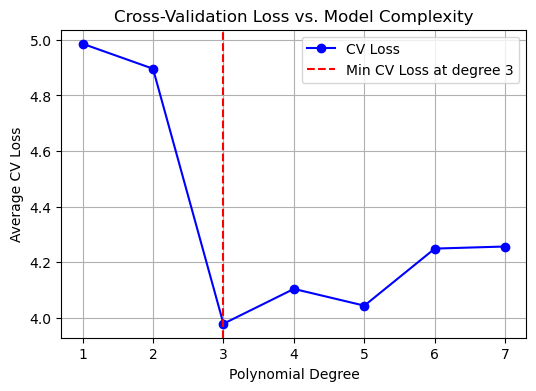

In [39]:
coeffs = np.array([1, 0, -5, 0])
n_samples = 100
x_range = (-2, 2)
pos_noise_std = 2
neg_noise_std = 2
random_seed = 42

# Generate the data.
x, y = generate_polynomial_data(n_samples, coeffs, x_range,
                                pos_noise_std, neg_noise_std, polynomial,
                                random_seed=random_seed)

# Degrees to try.
degrees = [1, 2, 3, 4, 5, 6, 7]

# Call the function.
plot_cv_loss_vs_degree(x, y, degrees, mse_loss, k=10, random_seed=42, fig_size=(6, 4))


In [40]:
# Do not consider the next cell.
# You do not have to do anything for the next cell.

In [42]:
check_and_prepare_for_submission()

The notebook and the history are ready for sumbission.
The following archive has been created in the parent directory with name: ecmm422ca1.zip
